# Day 06 — Loss & Cost Functions (What We Minimize)

## Objective
Understand **what training actually minimizes** in machine learning.

By the end of this notebook, it must be crystal clear:
- Why we do NOT minimize error or accuracy
- What loss and cost represent
- Why different tasks use different loss functions
- How loss geometry drives learning

This notebook directly prepares Gradient Descent (Day 7).


## The Big Picture

Every ML training loop does exactly three things:

1. Make predictions
2. Measure how bad those predictions are
3. Update parameters to reduce that badness

That "badness" is called **loss**.

Training = minimizing loss (more precisely, cost).


In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Error (Raw Difference)

**Error** is the raw difference between prediction and true value.

Example:
- True value = 10
- Prediction = 7
- Error = 3

Problems with error:
- Can be positive or negative
- Errors can cancel out
- Not suitable for optimization


In [2]:
y_true = np.array([10, 5])
y_pred = np.array([7, 8])

error = y_true - y_pred
error


array([ 3, -3])

## Loss (Per-Sample Punishment)

**Loss** converts error into a **non-negative punishment**.

Loss answers:
> "How bad was this prediction?"

Properties:
- Always ≥ 0
- Larger mistakes → larger loss
- Directionless (sign removed)

Gradients are computed from loss.


In [3]:
squared_error = (y_true - y_pred) ** 2
squared_error


array([9, 9])

## Cost (Dataset-Level Objective)

**Cost** is the average loss over the dataset.

This is the quantity training actually minimizes.

We do NOT minimize:
- Error
- Individual loss
- Accuracy

We minimize **average loss (cost)**.


In [4]:
cost = np.mean(squared_error)
cost


np.float64(9.0)

## Mean Squared Error (MSE)

MSE is the standard loss for regression.

Why it works:
- Squaring removes sign
- Large errors are punished more
- Produces smooth, convex loss surfaces (for linear models)

MSE assumes approximately Gaussian noise.


In [5]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


mse(y_true, y_pred)


np.float64(9.0)

## Loss vs Prediction (1D Geometry)

We fix the true value and vary the prediction.

This shows:
- Why the minimum occurs at the correct prediction
- Why loss increases symmetrically away from truth


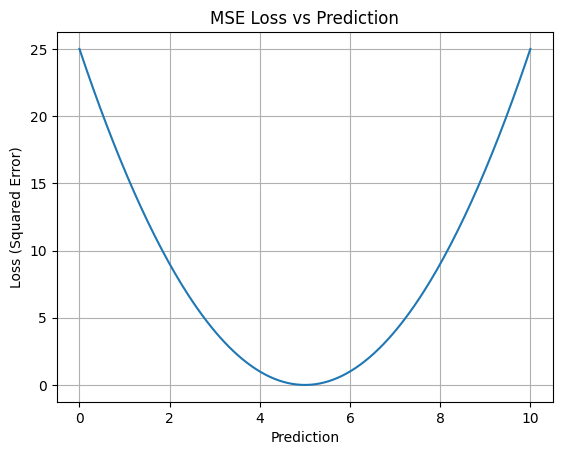

In [6]:
y = 5
y_hat = np.linspace(0, 10, 200)

loss_values = (y - y_hat) ** 2

plt.plot(y_hat, loss_values)
plt.xlabel("Prediction")
plt.ylabel("Loss (Squared Error)")
plt.title("MSE Loss vs Prediction")
plt.grid()
plt.show()


## Log Loss (Classification Intuition)

Log Loss measures how **surprised** the model is by the true label.

- High probability on correct class → small loss
- Low probability on correct class → large loss

It enforces **probability calibration**.


## Why Confident Wrong Predictions Are Punished

Being confident and wrong is worse than being uncertain.

Log Loss:
- Mildly penalizes uncertainty
- Brutally penalizes confident mistakes

This prevents overconfident, unreliable models.


In [7]:
def log_loss(y_true, p):
    """
    Binary Log Loss with numerical stability.
    Prevents log(0) and log(1) explosions.
    """
    epsilon = 1e-15
    p = np.clip(p, epsilon, 1 - epsilon)
    return -(y_true * np.log(p) + (1 - y_true) * np.log(1 - p))


## Numerical Stability (Critical Engineering Detail)

In practice, models can predict p = 0 or p = 1.

Problem:
- log(0) = −∞
- Loss → NaN
- Gradients break
- Training silently fails

Solution:
- Clip probabilities using a small epsilon
- This is standard in all ML libraries

This does NOT change learning behavior.
It prevents numerical failure.


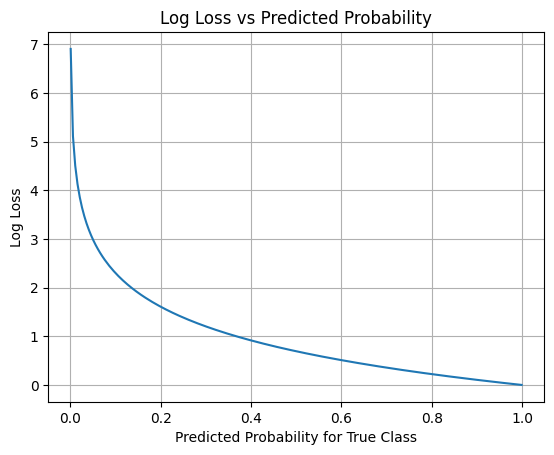

In [8]:
probs = np.linspace(0.001, 0.999, 200)
losses = [log_loss(1, p) for p in probs]

plt.plot(probs, losses)
plt.xlabel("Predicted Probability for True Class")
plt.ylabel("Log Loss")
plt.title("Log Loss vs Predicted Probability")
plt.grid()
plt.show()


## Loss Surface

Loss can be visualized as a surface over model parameters.

- Axes → model parameters
- Height → cost

Training = moving downhill on this surface.


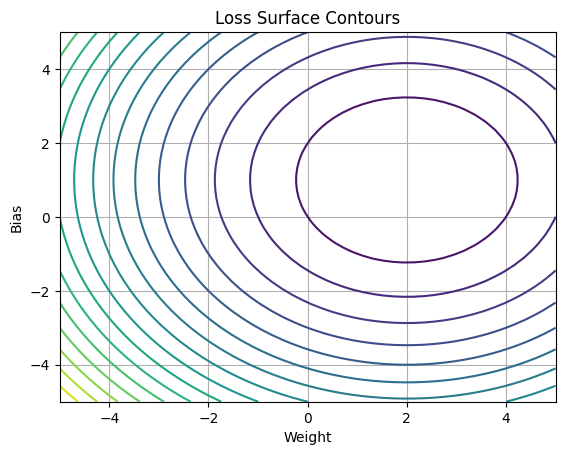

In [9]:
w_vals = np.linspace(-5, 5, 50)
b_vals = np.linspace(-5, 5, 50)

W, B = np.meshgrid(w_vals, b_vals)

# Simple convex loss surface
Z = (W - 2) ** 2 + (B - 1) ** 2

plt.contour(W, B, Z, levels=20)
plt.xlabel("Weight")
plt.ylabel("Bias")
plt.title("Loss Surface Contours")
plt.grid()
plt.show()


## ML Interpretation

- Loss = punishment signal
- Cost = average punishment
- Gradients come from loss
- Training = minimizing cost

Everything else in ML builds on this.


## Day 6 Summary — What Training Minimizes

- Error is raw difference
- Loss is per-sample punishment
- Cost is average loss
- MSE is for regression
- Log Loss is for classification
- Numerical stability matters

From now on:
> Training has one objective: minimize cost safely.


## Stop Condition

You proceed only if you can explain:

- Why error is not minimized directly
- Why loss must be non-negative
- Why cost is averaged
- Why MSE and Log Loss behave differently
- Why numerical stability matters

If any point is unclear, repeat Day 6.
